<a href="https://colab.research.google.com/github/pavancos/Flowise/blob/main/fetal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fetal Health Classification

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score , mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data=pd.read_csv('/content/drive/MyDrive/fetal_health.csv')
print(data)

      baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  

In [8]:
data.shape

(2126, 22)

In [9]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [10]:
data.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Length: 2126, dtype: bool

In [13]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [14]:
data["fetal_health"].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [15]:
data["fetal_movement"].value_counts()

0.000    1311
0.001     164
0.002     112
0.003      88
0.004      49
         ... 
0.079       1
0.109       1
0.103       1
0.031       1
0.099       1
Name: fetal_movement, Length: 102, dtype: int64

In [16]:
data["accelerations"].value_counts()

0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

In [17]:
data[1:5]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [18]:
# See the min, max, mean values of abnormal_short_term_variability
print('The highest abnormal_short_term_variability in the data :',data['abnormal_short_term_variability'].max())
print('The lowest abnormal_short_term_variability in the data:',data['abnormal_short_term_variability'].min())
print('The average abnormal_short_term_variability in the data:',data['abnormal_short_term_variability'].mean())

The highest abnormal_short_term_variability in the data : 87.0
The lowest abnormal_short_term_variability in the data: 12.0
The average abnormal_short_term_variability in the data: 46.99012229539041


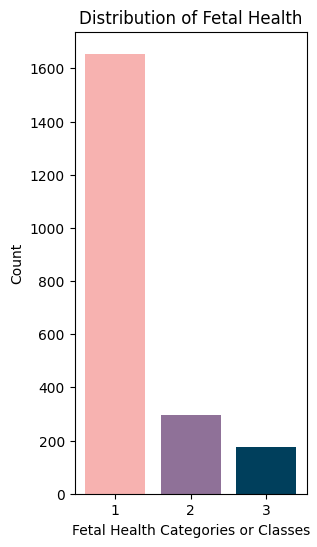

In [19]:

# Assuming you have a column 'Fetal_Health' in your dataset
fetal_health_counts = data['fetal_health'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(3,6))
plt.bar(fetal_health_counts.index, fetal_health_counts, color=("#f7b2b0","#8f7198", "#003f5c"))
plt.title('Distribution of Fetal Health')
plt.xlabel('Fetal Health Categories or Classes')
plt.ylabel('Count')
plt.show()


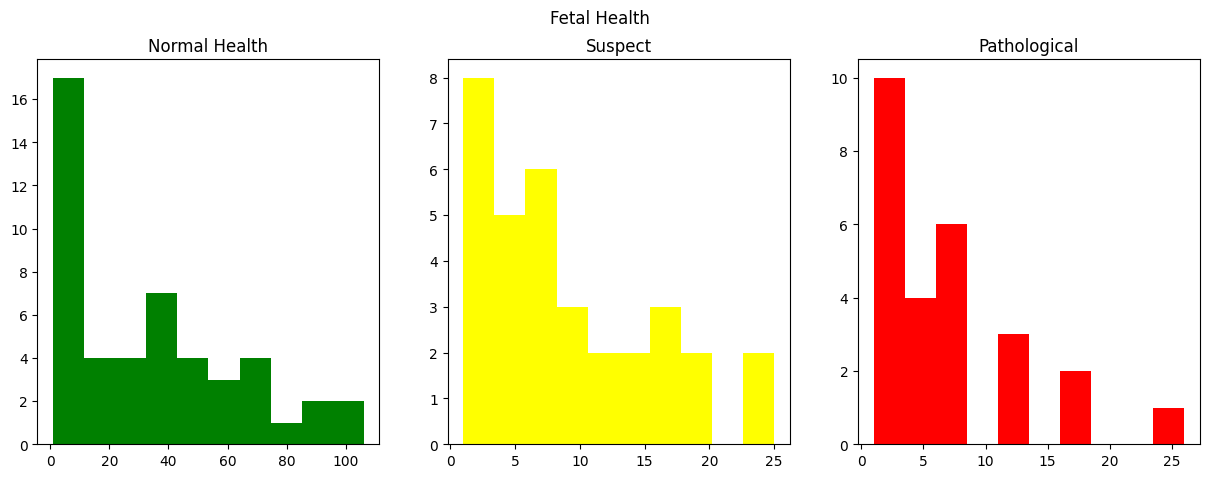

In [20]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
data_len=data[data['fetal_health']==1]['baseline value'].value_counts()

ax1.hist(data_len,color='green')
ax1.set_title('Normal Health')

data_len=data[data['fetal_health']==2]['baseline value'].value_counts()
ax2.hist(data_len,color='yellow')
ax2.set_title('Suspect')


data_len=data[data['fetal_health']==3]['baseline value'].value_counts()
ax3.hist(data_len,color='red')
ax3.set_title('Pathological')

fig.suptitle('Fetal Health')
plt.show()

##logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Assuming 'target_column' is the name of your target variable
X_train, X_test, y_train, y_test = train_test_split(data, data['fetal_health'], test_size=0.3, random_state=42)
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [22]:
# Assuming 'df' is your DataFrame
feature_names = data.columns.tolist()
print(feature_names)

['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

# Assuming 'classification' is a variable containing the target column name
classification = 'fetal_health'  # Replace with your actual target column name

# Select features (X) and target variable (y)
feature_columns = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']
X = data[feature_columns]
y = data[classification]

# Replace '\t?' with NaN
X.replace('\t?', np.nan, inplace=True)

# Convert columns to numeric (assuming that they are numeric features)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
predictions = model.predict(test_X)

# Evaluate the model
accuracy = metrics.accuracy_score(predictions, test_Y)
print('The accuracy of the Logistic Regression model is:', accuracy)

# Display the classification report
report = classification_report(test_Y, predictions)
print("Classification Report:\n", report)

The accuracy of the Logistic Regression model is: 0.8808777429467085
Classification Report:
               precision    recall  f1-score   support

         1.0       0.92      0.96      0.94       496
         2.0       0.75      0.50      0.60       101
         3.0       0.66      0.85      0.74        41

    accuracy                           0.88       638
   macro avg       0.78      0.77      0.76       638
weighted avg       0.88      0.88      0.87       638



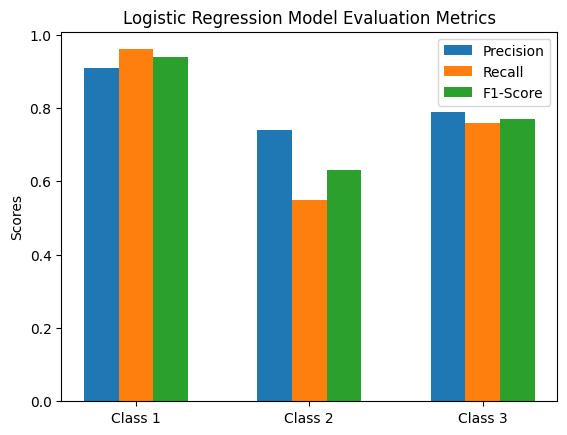

In [24]:
# Replace these values with your actual scores
precision = [0.91, 0.74,0.79]
recall = [0.96,0.55,0.76]
f1_score = [0.94,0.63,0.77]

labels = ['Class 1', 'Class 2','Class 3']

# Plotting the bar chart
width = 0.2
x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Adding labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Logistic Regression Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()



##linear regression

In [25]:

# Assuming 'classification' is a variable containing the target column name
classification = 'fetal_health'  # Replace with your actual target column name

# Select features (X) and target variable (y)
feature_columns = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']
X = data[feature_columns]
y = data[classification]

# Replace '\t?' with NaN
X.replace('\t?', np.nan, inplace=True)

# Convert columns to numeric (assuming that they are numeric features)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(train_X, train_Y)

# Make predictions on the test set
prediction = model.predict(test_X)

# Convert predictions to discrete classes (assuming a classification scenario)
predictions_classes = np.round(predictions).astype(int)

# Evaluate the model using accuracy (not typical for linear regression)
accuracy = accuracy_score(test_Y, predictions_classes)


# Evaluate the model using various metrics
mse = mean_squared_error(test_Y, prediction)
rmse = mean_squared_error(test_Y, prediction, squared=False)
mae = mean_absolute_error(test_Y, prediction)
r_squared = r2_score(test_Y, prediction)

print('Linear Regression Accuracy:', accuracy)
print('Mean squared Error:', mse)
print('Root Mean squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r_squared)


Linear Regression Accuracy: 0.8808777429467085
Mean squared Error: 3.6548185395300284e-30
Root Mean squared Error: 1.9117579709602438e-15
Mean Absolute Error: 1.5633610741743583e-15
R-squared: 1.0


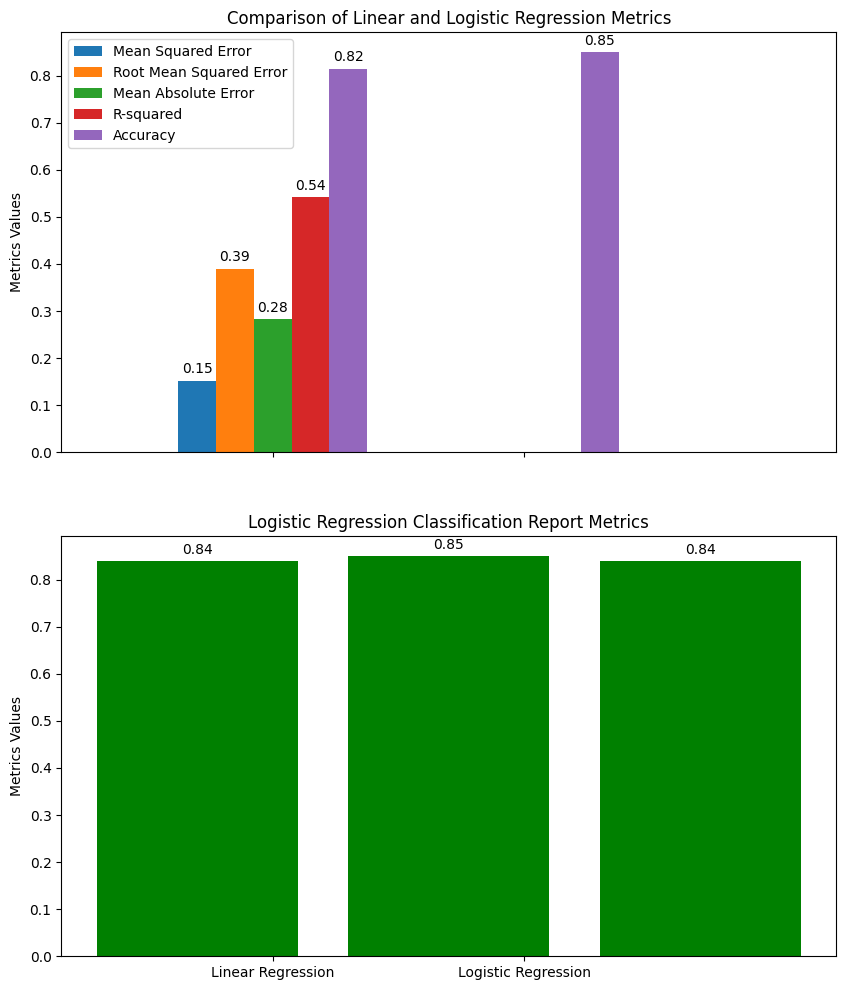

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'classification' is a variable containing the target column name
classification = 'fetal_health'

# Assuming data is your DataFrame
# Replace '\t?' with NaN
data.replace('\t?', np.nan, inplace=True)

# Select features (X) and target variable (y)
feature_columns = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']
X = data[feature_columns]
y = data[classification]

# Convert columns to numeric (assuming that they are numeric features)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Create a linear regression model
linear_model = LinearRegression()

# Fit the linear model to the training data
linear_model.fit(train_X, train_Y)

# Make predictions using linear regression
linear_predictions = linear_model.predict(test_X)

# Evaluate linear regression using various metrics
mse_linear = mean_squared_error(test_Y, linear_predictions)
rmse_linear = mean_squared_error(test_Y, linear_predictions, squared=False)
mae_linear = mean_absolute_error(test_Y, linear_predictions)
r_squared_linear = r2_score(test_Y, linear_predictions)

# Create a logistic regression model
logistic_model = LogisticRegression()

# Fit the logistic model to the training data
logistic_model.fit(train_X, train_Y)

# Make predictions using logistic regression
logistic_predictions = logistic_model.predict(test_X)

# Evaluate logistic regression using accuracy
accuracy_logistic = accuracy_score(test_Y, logistic_predictions)

# Evaluate linear regression using accuracy (not typical for regression, added for comparison)
accuracy_linear = accuracy_score(test_Y, np.round(linear_predictions).astype(int))

# Create a bar plot for metrics
models = ['Linear Regression', 'Logistic Regression']
mse_values = [mse_linear, np.nan]
rmse_values = [rmse_linear, np.nan]
mae_values = [mae_linear, np.nan]
r_squared_values = [r_squared_linear, np.nan]
accuracy_values = [accuracy_linear, accuracy_logistic]

bar_width = 0.15
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, mse_values, bar_width, label='Mean Squared Error')
bar2 = ax.bar(index + bar_width, rmse_values, bar_width, label='Root Mean Squared Error')
bar3 = ax.bar(index + 2 * bar_width, mae_values, bar_width, label='Mean Absolute Error')
bar4 = ax.bar(index + 3 * bar_width, r_squared_values, bar_width, label='R-squared')
bar5 = ax.bar(index + 4 * bar_width, accuracy_values, bar_width, label='Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Metrics Values')
ax.set_title('Comparison of Linear and Logistic Regression Metrics')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(models)
ax.legend()

# Display the values on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)

plt.show()

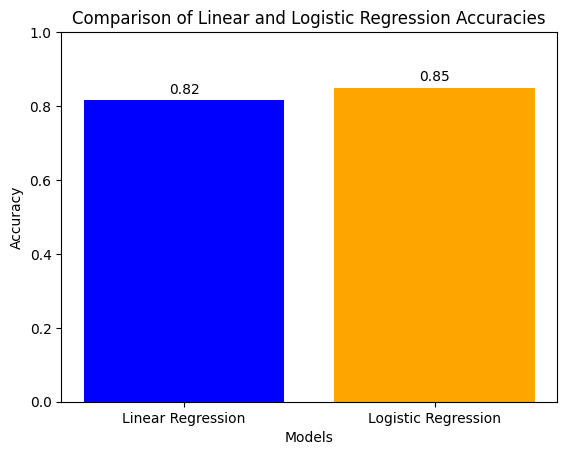

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer

# Assuming 'classification' is a variable containing the target column name
classification = 'fetal_health'

# Assuming data is your DataFrame
# Replace '\t?' with NaN
data.replace('\t?', np.nan, inplace=True)

# Select features (X) and target variable (y)
feature_columns = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']
X = data[feature_columns]
y = data[classification]

# Convert columns to numeric (assuming that they are numeric features)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Create a linear regression model
linear_model = LinearRegression()

# Fit the linear model to the training data
linear_model.fit(train_X, train_Y)

# Make predictions using linear regression
linear_predictions = linear_model.predict(test_X)

# Evaluate linear regression using accuracy (not typical for regression, added for comparison)
accuracy_linear = accuracy_score(test_Y, np.round(linear_predictions).astype(int))

# Create a logistic regression model
logistic_model = LogisticRegression()

# Fit the logistic model to the training data
logistic_model.fit(train_X, train_Y)

# Make predictions using logistic regression
logistic_predictions = logistic_model.predict(test_X)

# Evaluate logistic regression using accuracy
accuracy_logistic = accuracy_score(test_Y, logistic_predictions)

# Create a bar plot for accuracies
models = ['Linear Regression', 'Logistic Regression']
accuracies = [accuracy_linear, accuracy_logistic]

plt.bar(models, accuracies, color=['blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Linear and Logistic Regression Accuracies')

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()


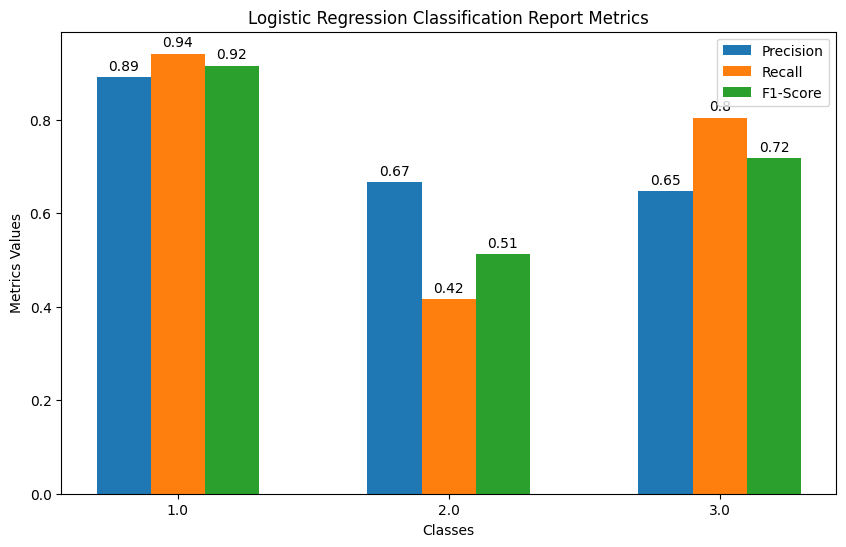

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Assuming 'classification' is a variable containing the target column name
classification = 'fetal_health'

# Assuming data is your DataFrame
# Replace '\t?' with NaN
data.replace('\t?', np.nan, inplace=True)

# Select features (X) and target variable (y)
feature_columns = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']
X = data[feature_columns]
y = data[classification]

# Convert columns to numeric (assuming that they are numeric features)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
predictions = model.predict(test_X)

# Display the classification report
report = classification_report(test_Y, predictions, output_dict=True)

# Extract class labels from the classification report
class_labels = [label for label in report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract metrics from the classification report
precision = [report[label]['precision'] for label in class_labels]
recall = [report[label]['recall'] for label in class_labels]
f1_score = [report[label]['f1-score'] for label in class_labels]

# Create a bar plot for classification report metrics
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(class_labels))

bar1 = ax.bar(index, precision, bar_width, label='Precision')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall')
bar3 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-Score')

ax.set_xlabel('Classes')
ax.set_ylabel('Metrics Values')
ax.set_title('Logistic Regression Classification Report Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(class_labels)  # Use class labels instead of report keys
ax.legend()

# Display the values on top of the bars
def autolabel(bars):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        ax.annotate('{}'.format(i),  # Display index below the bar
                    xy=(bar.get_x() + bar.get_width() / 2, -10),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='gray')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()
